#### Star classification with knn algorithm

This notebook aims to classify a image with stars using **knn** algorithm.

#### Required Modules

**numpy ->** Used for Scientific computing with Python. It provides support for large, multi-dimensional arrays and matrice. 

**sklearn ->** Machine learning library for Python. It provides tools for data mining and data analysis, such as various algorithms for classification, regression, clustering, dimensionality reduction, and model selection.

**matplotlib ->** Matplotlib is a plotting library for Python that provides a MATLAB-like interface for creating static, interactive, and animated visualizations. It allows you to generate plots, histograms, bar charts, scatterplots and more...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.neighbors import KNeighborsClassifier

#### Loading the choosen image

In [2]:
image = io.imread('./Images/01 - stars.png')

#### Assuming grayscale image

The reason to work with grayscale or binary is the use of a single scale (from black to white) simplifies the task of defining a threshold to separate the stars from the background. 

In [3]:
gray_image = io.imread('./Images/01 - stars.png', as_gray=True)


**threshold**: parameter used to separate stars from the background in the image. It represents a grayscale value between 0 and 1. Pixels with intensity values greater than this threshold are considered as stars, while pixels with intensity values equal to or less than the threshold are considered as background or non-stars.

- lower threshold: will include more pixels in the "star" category, potentially capturing fainter stars but also possibly including more noise or background artifacts. 

- higher threshold: will be more selective, capturing only the brightest stars but potentially missing fainter ones.


In [4]:
threshold = 0.7

grayscale_image > threshold: selects all the pixels in the grayscale image that have intensity values greater than the specified threshold. These pixels are considered as stars because their intensity is higher than the threshold value.

grayscale_image <= threshold: selects all the pixels in the grayscale image that have intensity values less than or equal to the specified threshold. These pixels are considered as non-stars because their intensity is lower than or equal to the threshold value.

The code separates the pixels into two groups: star_pixels contains the coordinates of pixels classified as stars, and non_star_pixels contains the coordinates of pixels classified as non-stars.  This separation allows for further processing or analysis of these pixel groups independently, such as training a machine learning model to classify stars or performing statistical analysis on the background.

In [5]:
star_pixels = np.argwhere(gray_image > threshold)
non_star_pixels = np.argwhere(gray_image <= threshold)

np.argwhere(...): gives the coordinates of all pixels where the intensity is non-zero, all pixels in the image.

np.ones_like(grayscale_image): creates a binary image of the same shape as grayscale_image where all pixels are set to 1. it creates an image with the same dimensions as the grayscale image, but with all pixel intensities set to 1.

np.argwhere(...): returns the coordinates of all non-zero elements in the binary image generated by np.ones_like(...). it gives the coordinates of all pixels where the intensity is non-zero, which in this case, is all pixels in the image.

pixel_coords will contain the coordinates of all pixels in the grayscale image,this is often used for various operations such as feature extraction, segmentation, or combining with other data for analysis.

In [6]:
pixel_coords = np.argwhere(np.ones_like(gray_image))



grayscale_image.reshape(-1, 1): reshapes the grayscale image into a column vector, where each pixel intensity value occupies a single row. The -1 argument in the reshape function indicates that NumPy should infer the number of rows based on the size of the original image, and 1 indicates that there is only one column in the reshaped array. This column vector represents the intensity values of all pixels in the grayscale image.

pixel_coords: this array contains the coordinates of all pixels in the grayscale image, as generated earlier using np.argwhere(np.ones_like(grayscale_image)).

np.concatenate(...): concatenates the arrays pixel_coords and grayscale_image.reshape(-1, 1) along the specified axis. By using axis=1, the arrays are concatenated column-wise. This results in a feature matrix where each row corresponds to a pixel in the image, with the first two columns representing the coordinates of the pixel and the third column representing the grayscale intensity value of that pixel.

this is commonly used as input data for K-nearest neighbors classifier.

In [7]:
features = np.concatenate((pixel_coords, gray_image.reshape(-1, 1)), axis=1)

labels = np.zeros(grayscale_image.size): initializes an array of zeros with the same size as the flattened grayscale image. this array will serve as labels for the pixels, where 0 represents non-star pixels and 1 represents star pixels.

star_indices = np.ravel_multi_index((star_pixels[:, 0], star_pixels[:, 1]), grayscale_image.shape): computes the flattened indices of star pixels in the grayscale image using np.ravel_multi_index. The star_pixels array contains the coordinates of star pixels. ravel_multi_index, it computes the corresponding flattened indices.

labels[star_indices] = 1: assigns a value of 1 to the indices of star pixels in the labels array. By doing so, it marks these pixels as stars in the labels array.

the labels array will contain binary labels indicating whether each pixel in the grayscale image is a star (1) or not (0). this labeled will be used to training machine learning models, such as the K-nearest neighbors (KNN) classifier used in this context.

In [8]:
labels = np.zeros(gray_image.size)
star_indices = np.ravel_multi_index((star_pixels[:, 0], star_pixels[:, 1]), gray_image.shape)
labels[star_indices] = 1 

knn = KNeighborsClassifier(n_neighbors=3): creates a classifier object with a parameter n_neighbors=3, specifying that the classifier should consider the labels of the three nearest neighbors when making predictions. 

knn.fit(features, labels): trains the classifier using the provided features and corresponding labels. The features array contains the coordinates and grayscale intensity values of all pixels in the image, while the labels array contains binary labels indicating whether each pixel is a star or not. 

The classifier will learn from this labeled data to make predictions about the classification of unseen pixels based on their features.


In [9]:
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(features, labels)

KNeighborsClassifier(n_neighbors=6)

predicted_labels = knn.predict(features): predicts the labels (classifications) of the pixels in the image using the trained knn classifier.

knn.predict(features): takes the features of the pixels as input and predicts the corresponding labels. In this case, features contains the coordinates and grayscale intensity values of all pixels in the image. The classifier uses the trained model to predict whether each pixel is a star or not based on its features.

predicted_labels will contain the predicted labels for each pixel in the image, indicating whether the classifier predicts each pixel to be a star (1) or not (0). these predicted labels can be further analyzed or used for various purposes, such as visualization or quantitative analysis of the image data.

In [10]:
predicted_labels = knn.predict(features)


predicted_labels.reshape(grayscale_image.shape): reshapes the 1D array of predicted labels (predicted_labels) into the shape of the original grayscale image (grayscale_image). The shape of grayscale_image is used as the target shape for the reshaping operation to ensure that the reshaped array has the same dimensions as the original image.

classified_image will contain the predicted labels for each pixel in the same arrangement as the original grayscale image. this array represents the classification result where each pixel is labeled as either a star or a non-star based on the predictions made by the classifier.

In [11]:
classified_image = predicted_labels.reshape(gray_image.shape)


#### Viewing the results


**plt.figure:** Creates a new figure for plotting with a figure size of 10 inches by 8 inches.

**plt.imshow:** Displays the segmented image using the imshow() function from Matplotlib. 

**plt.subplot(1, 2, 1)**: Creates a subplot grid within the current figure where subsequent plot commands will draw on the first subplot.

1: Number of rows in the subplot grid.
2: Number of columns in the subplot grid.
1: Index of the current subplot.

plt.subplot(1, 2, 1) specifies a subplot grid with 1 row and 2 columns, and selects the first subplot leftmost for plotting.

**plt.title**: Shows the title of the plot 

**plt.colorbar:** This line adds a colorbar to the plot

**plt.show():** Displays the plot.

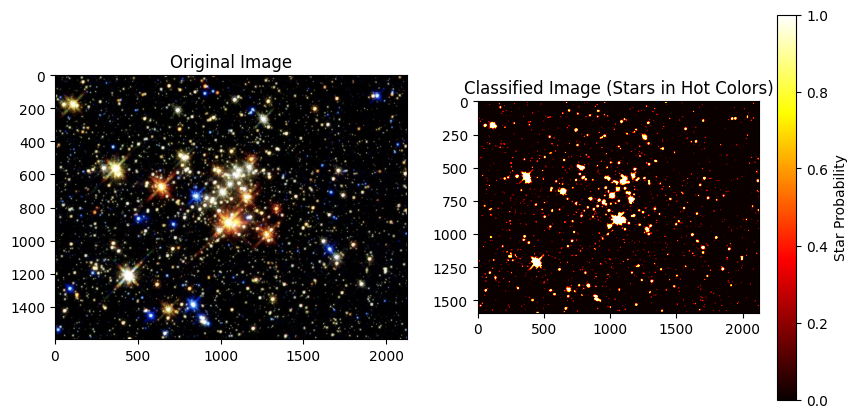

In [12]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
# hot colormap for better visualization
plt.imshow(classified_image, cmap='hot')  
plt.title("Classified Image")
plt.colorbar(label="Star Probability") 
plt.show()
